# 读取数据

In [2]:
import pandas as pd
import glob

# 指定需要读取的列
columns_to_read = ['id', 'age', 'income', 'purchase_history', 'is_active', 'gender']

# 获取所有满足条件的文件列表
file_list = sorted(glob.glob('10G_data_new/part-*.parquet'))

# 使用生成器表达式来读取每个文件
df = pd.concat(
    (pd.read_parquet(file, columns=columns_to_read, engine='pyarrow') for file in file_list),
    ignore_index=True
)

df.head()


,id,age,income,purchase_history,is_active,gender
0,0,82,366311.83,"{""avg_price"":9496,""categories"":""零食"",""items"":[{...",False,女
1,1,71,833917.30,"{""avg_price"":3014,""categories"":""手套"",""items"":[{...",True,男
2,2,54,839379.17,"{""avg_price"":8921,""categories"":""裙子"",""items"":[{...",True,女
3,3,18,383963.16,"{""avg_price"":939,""categories"":""耳机"",""items"":[{""...",False,男
4,4,77,337059.32,"{""avg_price"":959,""categories"":""手套"",""items"":[{""...",False,男


# 初步了解数据

In [4]:
df.shape

(45000000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000000 entries, 0 to 44999999
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                int64  
 1   age               int64  
 2   income            float64
 3   purchase_history  object 
 4   is_active         bool   
 5   gender            object 
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 1.7+ GB


In [6]:
df.isnull().sum()

id                  0
age                 0
income              0
purchase_history    0
is_active           0
gender              0
dtype: int64

# 可视化方式展示分析结果

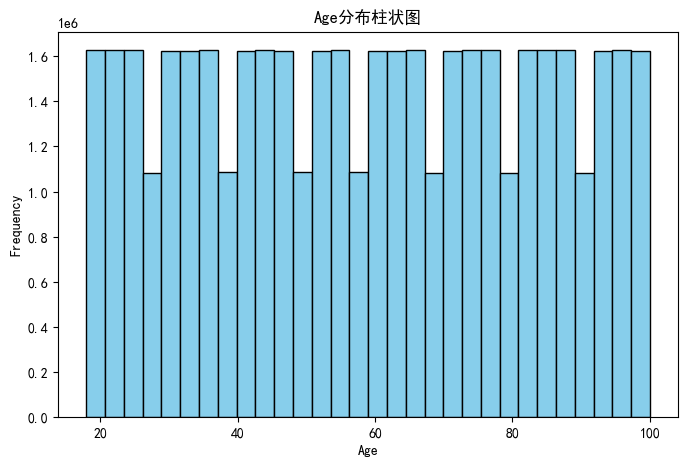

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Age分布柱状图")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

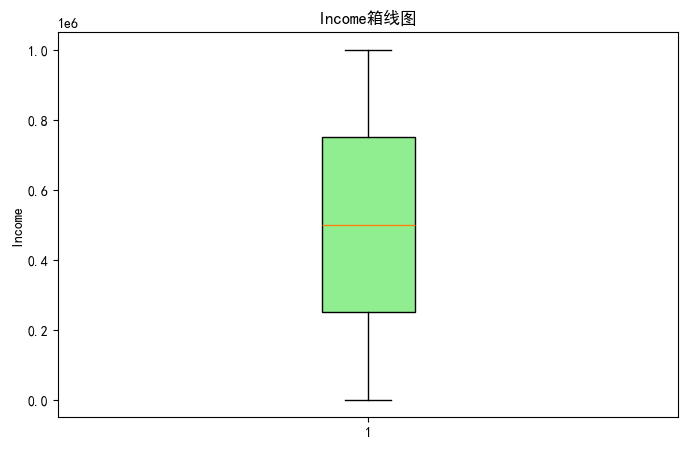

In [9]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 5))
plt.boxplot(df['income'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Income箱线图")
plt.ylabel("Income")
plt.show()

In [10]:
# 定义函数来提取 avg_price
def extract_avg_price(purchase_history_str):
    try:
        # 将字符串转换为字典
        purchase_dict = json.loads(purchase_history_str)
        # 返回 avg_price 的值
        return purchase_dict.get('avg_price', None)
    except (json.JSONDecodeError, TypeError):
        return None  # 如果解析失败则返回 None

# 应用函数到 purchase_history 列，生成新的avg_price列
df['avg_price'] = df['purchase_history'].apply(extract_avg_price)

df.head()

,id,age,income,purchase_history,is_active,gender,avg_price
0,0,82,366311.83,"{""avg_price"":9496,""categories"":""零食"",""items"":[{...",False,女,9496
1,1,71,833917.30,"{""avg_price"":3014,""categories"":""手套"",""items"":[{...",True,男,3014
2,2,54,839379.17,"{""avg_price"":8921,""categories"":""裙子"",""items"":[{...",True,女,8921
3,3,18,383963.16,"{""avg_price"":939,""categories"":""耳机"",""items"":[{""...",False,男,939
4,4,77,337059.32,"{""avg_price"":959,""categories"":""手套"",""items"":[{""...",False,男,959


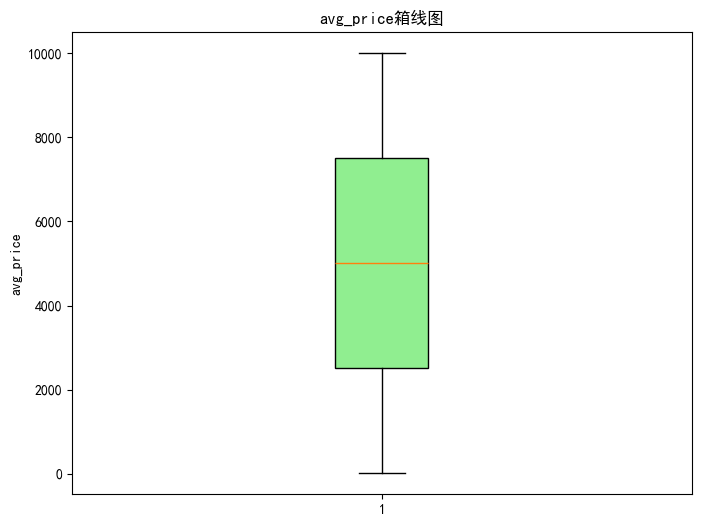

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
plt.boxplot(df['avg_price'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('avg_price箱线图')
plt.ylabel('avg_price')
plt.show()

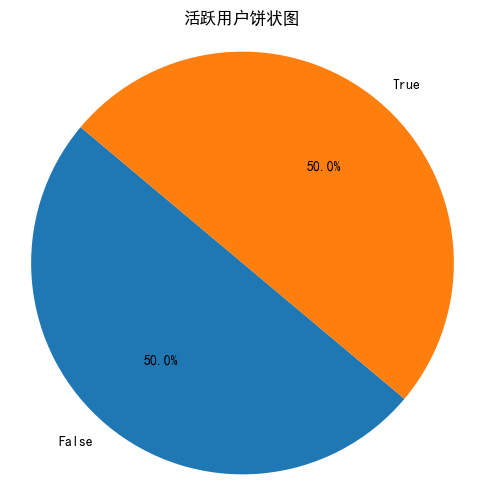

In [12]:
import matplotlib.pyplot as plt

active_counts = df['is_active'].value_counts()

labels = active_counts.index.astype(str)
sizes = active_counts.values

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('活跃用户饼状图')
plt.axis('equal')
plt.show()

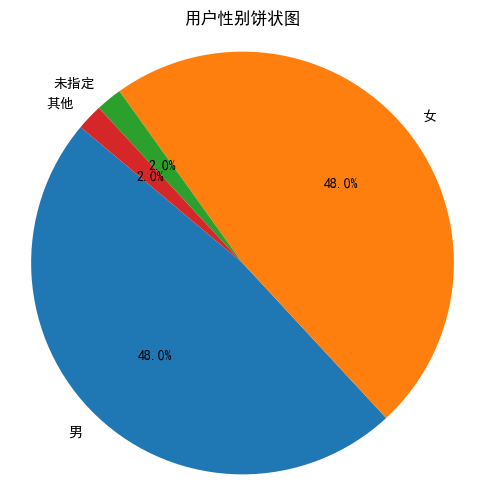

In [13]:
gender_counts = df['gender'].value_counts()

labels = gender_counts.index.astype(str)
sizes = gender_counts.values

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('用户性别饼状图')
plt.axis('equal')
plt.show()

# 数据预处理

In [15]:
# 去除年龄较大的异常值
df = df[(df['age'] <= 65)]

# 去除收入过低的异常值
df = df[(df['income'] > 10000)]

# 去除性别缺失值
df = df[(df['gender'] != '未指定') & (df['gender'] != '其他')]

df.shape

(24733310, 7)

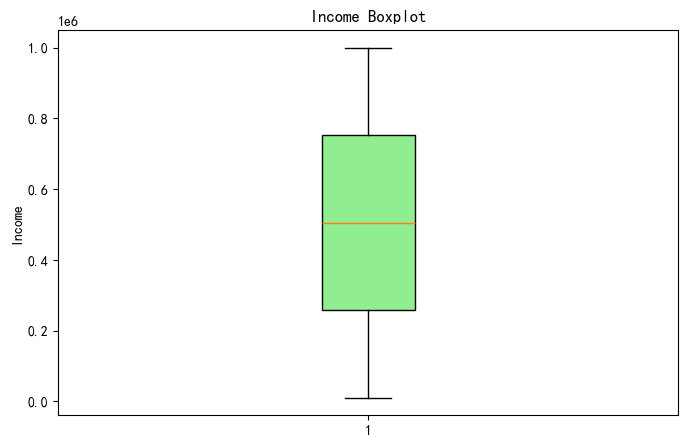

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 5))
plt.boxplot(df['income'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Income Boxplot")
plt.ylabel("Income")
plt.show()

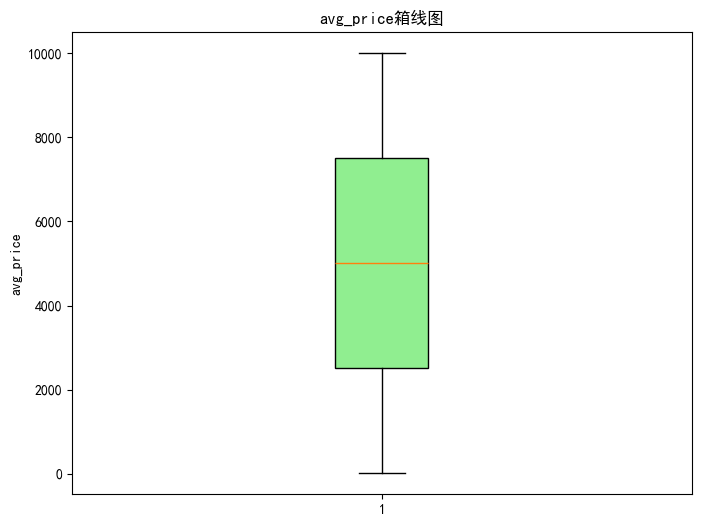

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
plt.boxplot(df['avg_price'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('avg_price箱线图')
plt.ylabel('avg_price')
plt.show()

In [18]:
# 定义收入阈值
income_threshold = 780000

# 定义购买商品价值阈值
avg_price_threshold = 5000

# 筛选高价值用户
high_value_users = df[
    (df['income'] >= income_threshold) &
    (df['avg_price'] >= avg_price_threshold) &
    (df['is_active'] == True)
]

# 统计高价值用户数量
print(f"高价值用户数量：{high_value_users.shape[0]}")
print(f"高价值用户占比：{high_value_users.shape[0] / df.shape[0] * 100}%")


高价值用户数量：1374254
高价值用户占比：5.5562882606493025%
